In [12]:
import os
import random
import pathlib
import collections

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [13]:
MNIST_FOLDER = r'C:\Users\User\Documents\Progs\Projects\MNIST'

MNIST_RESULTS_FOLDER = os.path.join(MNIST_FOLDER, 'results')

In [14]:
num_epochs = 20
epochs = range(num_epochs)

train_labels = []
train_true_labels = []

test_labels = []
test_true_labels = []



for i in range(num_epochs):
    current_file_path = os.path.join(MNIST_RESULTS_FOLDER, f'epoch_{i}_train_labels_rotated.npy')
    train_labels.append(np.fromfile(current_file_path, dtype=np.int32))

    current_file_path = os.path.join(MNIST_RESULTS_FOLDER, f'epoch_{i}_train_true_labels_rotated.npy')
    train_true_labels.append(np.fromfile(current_file_path, dtype=np.int32))

    current_file_path = os.path.join(MNIST_RESULTS_FOLDER, f'epoch_{i}_test_labels_rotated.npy')
    test_labels.append(np.fromfile(current_file_path, dtype=np.int32))

    current_file_path = os.path.join(MNIST_RESULTS_FOLDER, f'epoch_{i}_test_true_labels_rotated.npy')
    test_true_labels.append(np.fromfile(current_file_path, dtype=np.int32))
    
train_labels = np.array(train_labels)
train_true_labels = np.array(train_true_labels)
test_labels = np.array(test_labels)
test_true_labels = np.array(test_true_labels)

In [15]:
test_accuracy = np.zeros((num_epochs))
train_accuracy = np.zeros((num_epochs))

for i in range(num_epochs):
    train_accuracy[i] = np.mean(train_labels[i] == train_true_labels[i]) 
    test_accuracy[i] = np.mean(test_labels[i] == test_true_labels[i])

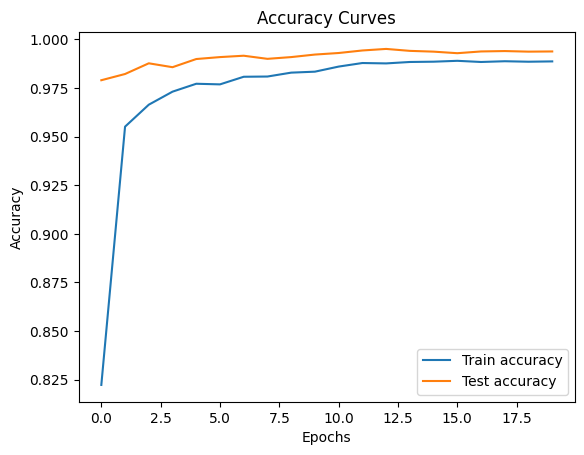

In [16]:
plt.plot(epochs, train_accuracy, label='Train accuracy')
plt.plot(epochs, test_accuracy, label='Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()
plt.show()

In [17]:
# test accuracy > train accuracy из-за аугументаций на train + dropout, но не на test

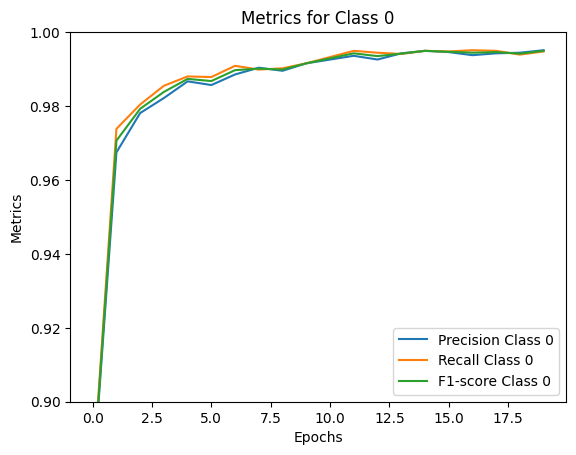

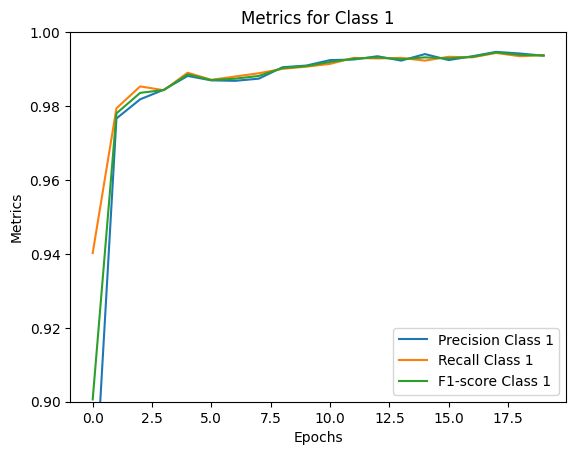

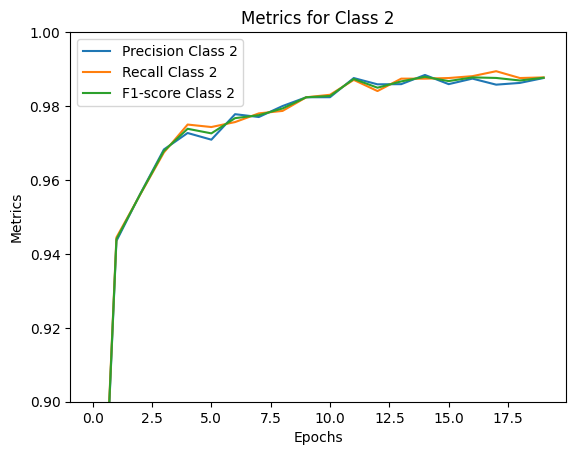

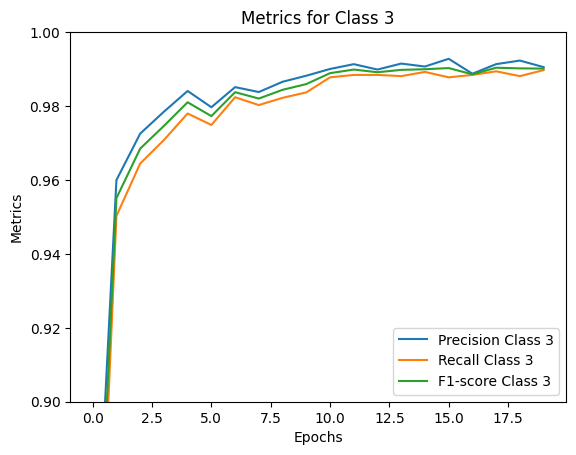

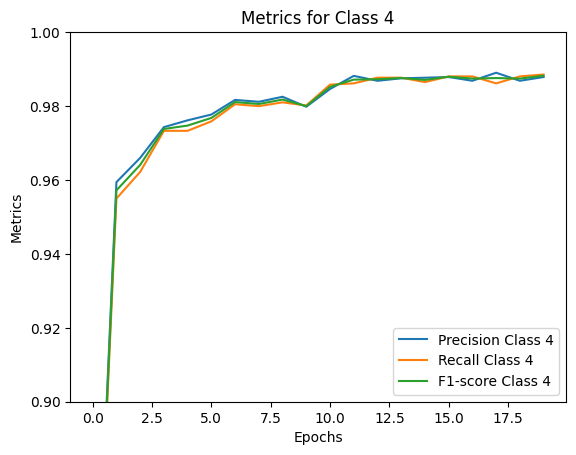

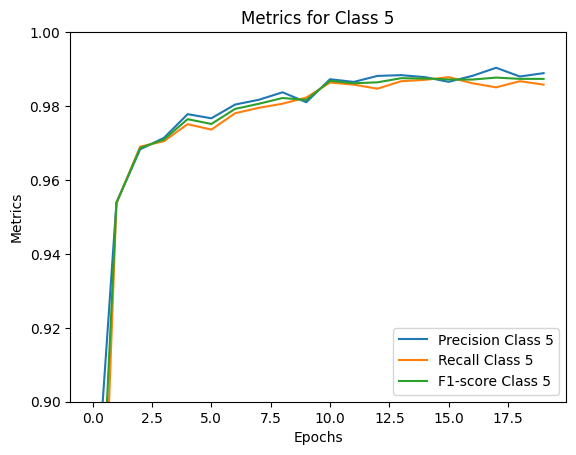

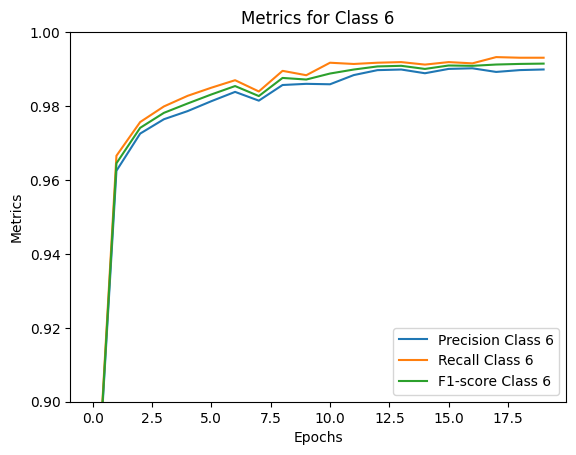

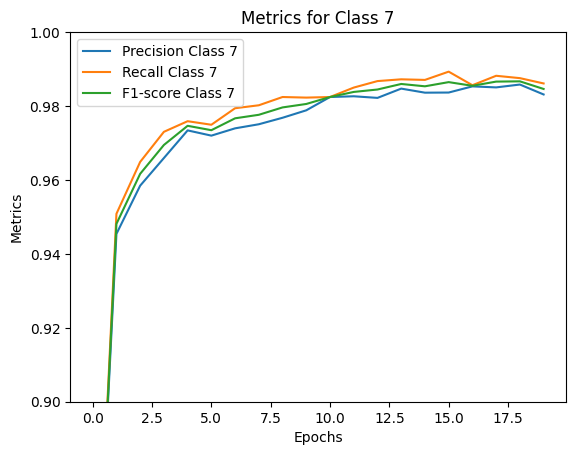

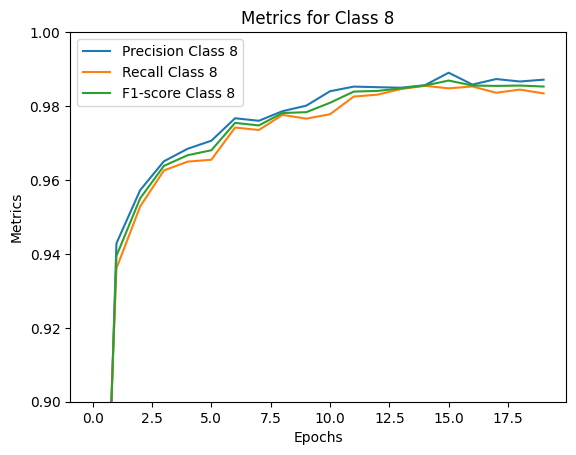

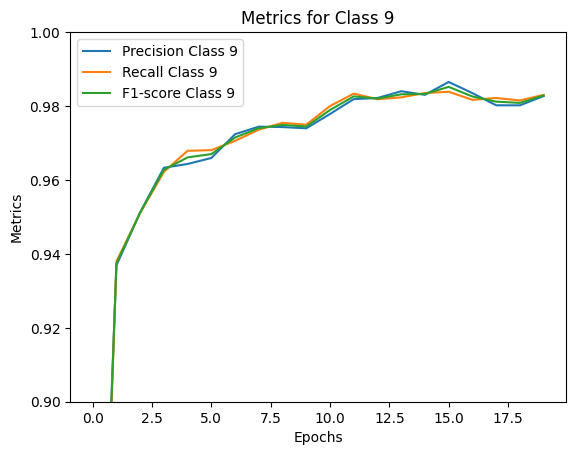

In [18]:
# графики train
for class_id in range(10): # 10 классов
    precisions = []
    recalls = []
    f1_scores = []
    for i in range(num_epochs):
        report = classification_report(train_true_labels[i], train_labels[i], output_dict=True, zero_division=0)
        precisions.append(report[str(class_id)]['precision'])
        recalls.append(report[str(class_id)]['recall'])
        f1_scores.append(report[str(class_id)]['f1-score'])

    plt.plot(epochs, precisions, label=f'Precision Class {class_id}')
    plt.plot(epochs, recalls, label=f'Recall Class {class_id}')
    plt.plot(epochs, f1_scores, label=f'F1-score Class {class_id}')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.title(f'Metrics for Class {class_id}')
    plt.ylim(0.9, 1)
    plt.legend()
    plt.show()

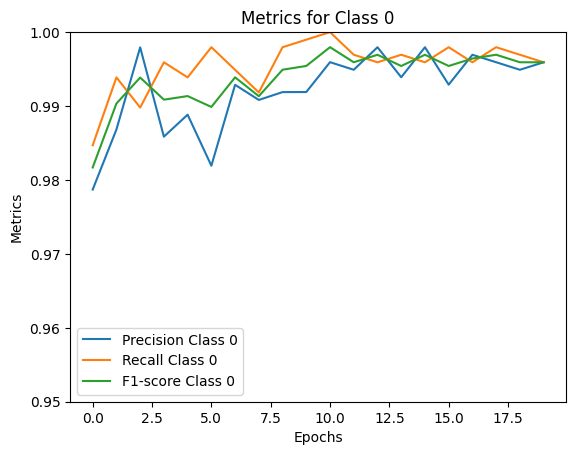

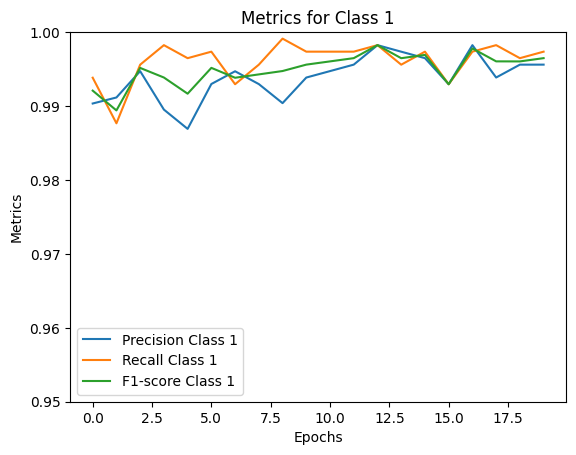

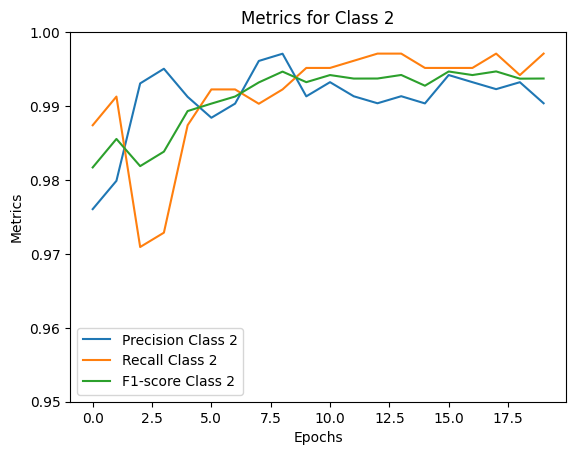

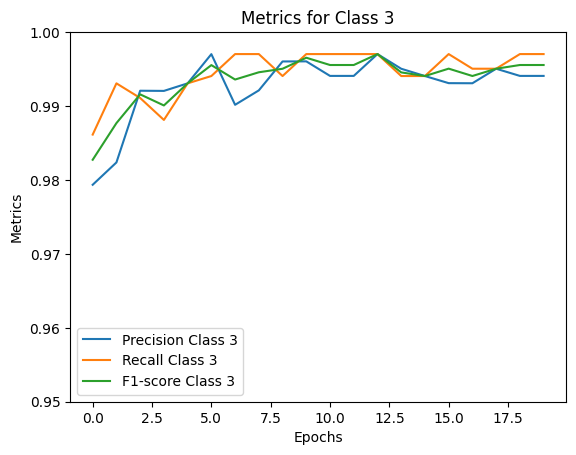

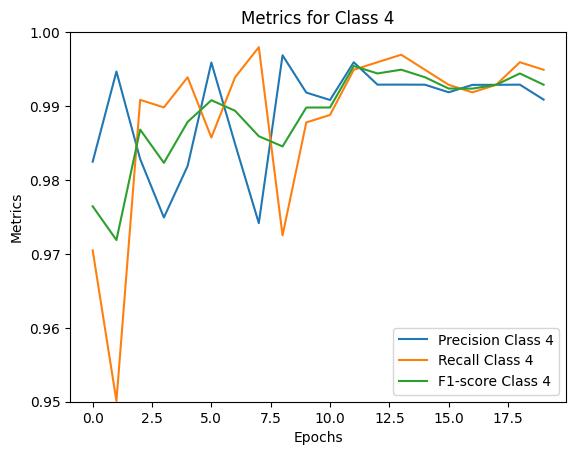

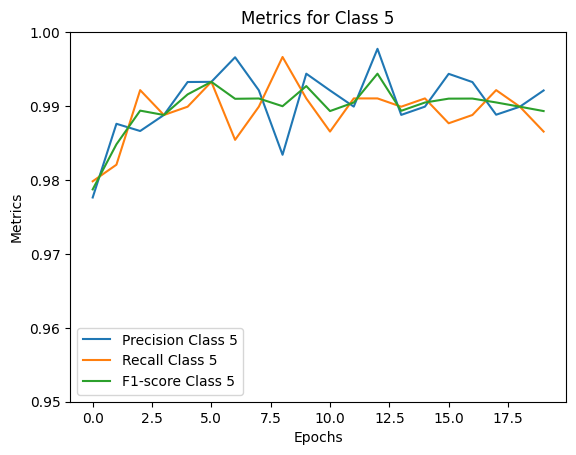

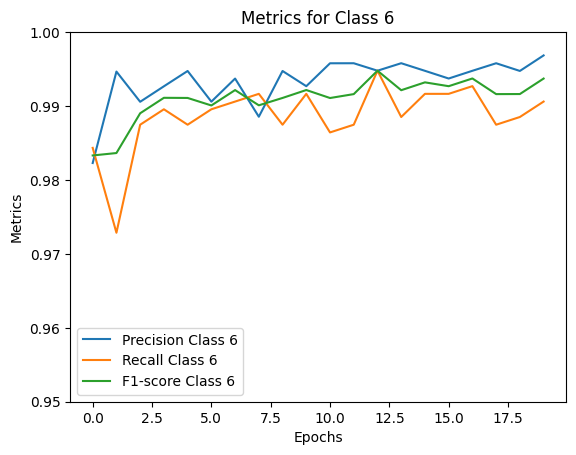

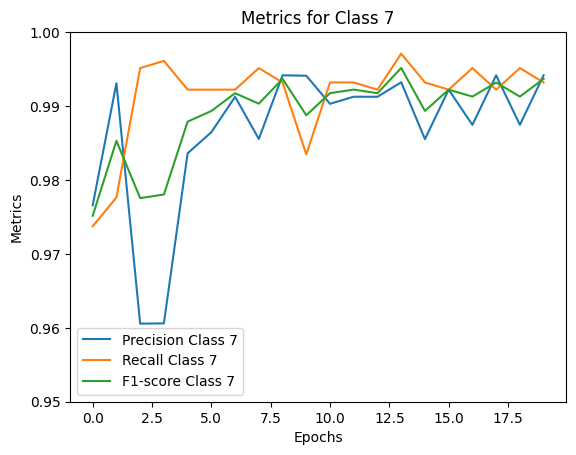

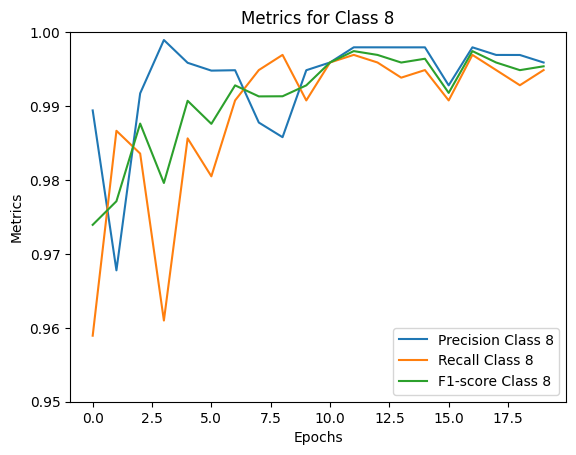

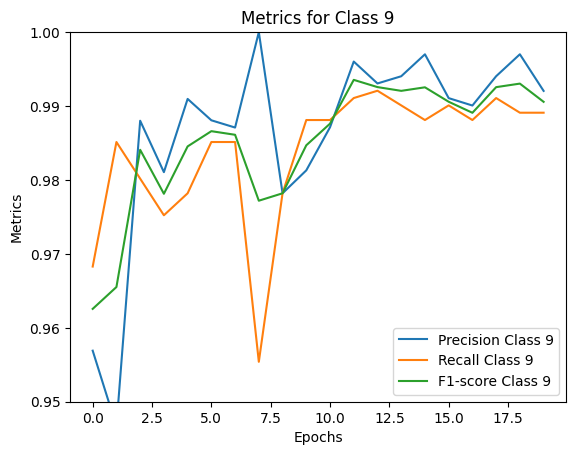

In [19]:
# графики test
for class_id in range(10): # 10 классов
    precisions = []
    recalls = []
    f1_scores = []
    for i in range(num_epochs):
        report = classification_report(test_true_labels[i], test_labels[i], output_dict=True, zero_division=0)
        precisions.append(report[str(class_id)]['precision'])
        recalls.append(report[str(class_id)]['recall'])
        f1_scores.append(report[str(class_id)]['f1-score'])

    plt.plot(epochs, precisions, label=f'Precision Class {class_id}')
    plt.plot(epochs, recalls, label=f'Recall Class {class_id}')
    plt.plot(epochs, f1_scores, label=f'F1-score Class {class_id}')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.title(f'Metrics for Class {class_id}')
    plt.ylim(0.95, 1)
    plt.legend()
    plt.show()

Normalized confusion matrix


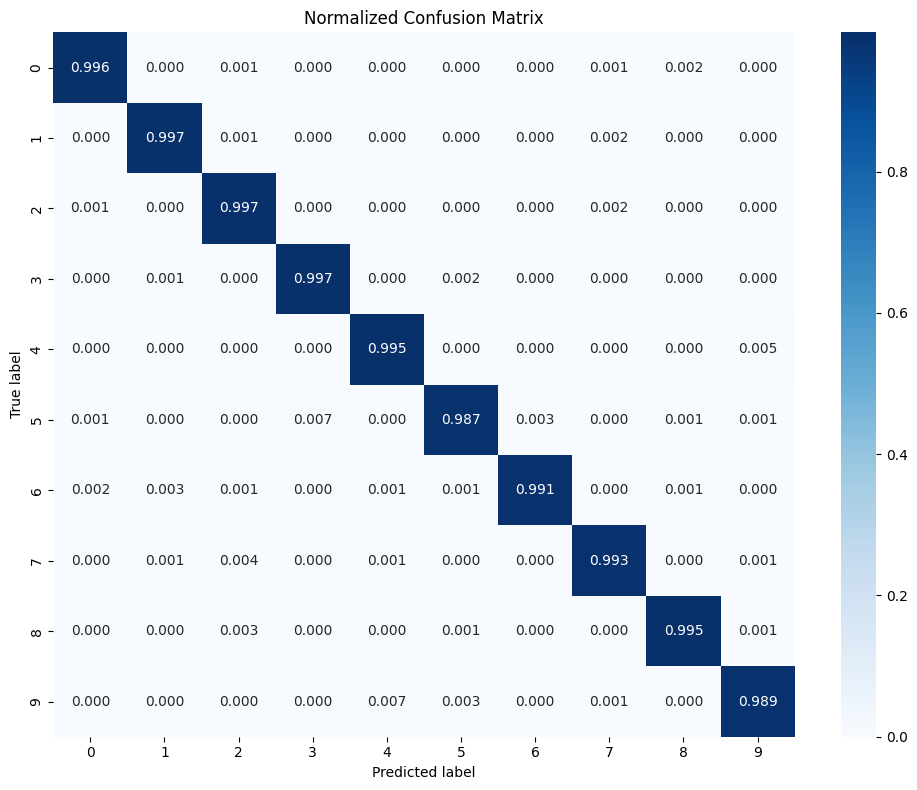

In [ ]:
def plot_confusion_matrix(true_labels, predicted_labels, classes=None, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    Строит матрицу ошибок.

    Args:
        true_labels: Истинные метки классов.
        predicted_labels: Предсказанные метки классов.
        classes: Список названий классов (для отображения на графике).
        normalize: Если True, матрица нормализуется (отображаются доли вместо количества).
        title: Заголовок графика.
        cmap: Цветовая карта.
    """
    cm = confusion_matrix(true_labels, predicted_labels, labels=classes) # labels - порядок классов
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(10, 8)) #увеличим размер графика
    sns.heatmap(cm, annot=True, fmt=".3f" if normalize else "d", cmap=cmap,
                xticklabels=classes if classes is not None else np.unique(true_labels), #подписи осей
                yticklabels=classes if classes is not None else np.unique(true_labels)) #подписи осей
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout() #чтобы надписи не вылезали за пределы графика
    plt.show()




#последняя эпоха

class_names = [i for i in range(10)] # названия классов

plot_confusion_matrix(test_true_labels[-1], test_labels[-1], normalize=True, title='Normalized Confusion Matrix')